In [2]:
print("The Goal of this Project is to reduce hospital readmission rate using the RandomForest Classifier Model")

The Goal of this Project is to reduce hospital readmission rate using the RandomForest Classifier Model


In [3]:
# Importing necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load the data
df = pd.read_csv("clinical_dataset.csv")

In [5]:
pd.set_option("display.max_columns", None)
print(df.head())

                             Patient_ID  Age  Gender Admission_Date  \
0  aedeaddb-3742-4bd3-a271-e71eda812643   54    Male      6/26/2022   
1  edba4932-45b3-4dde-b5d6-27471de729e6   72  Female      8/19/2021   
2  cf805166-49a5-4168-8e37-da7be55eca28   34  Female       9/6/2024   
3  08293bd9-0e82-495a-84ca-f9f383dc968a   15    Male      5/27/2021   
4  e9e7f750-f4a8-4cae-9fe6-c2d72f92e687   21    Male      2/16/2024   

  Discharge_Date Primary_Diagnosis                   Treatment  \
0       7/1/2022            Sepsis  Broad-Spectrum Antibiotics   
1      8/22/2021     Typhoid Fever                 Ceftriaxone   
2       9/7/2024            Sepsis  Broad-Spectrum Antibiotics   
3      5/30/2021    Severe Malaria               IV Artesunate   
4      2/19/2024    Severe Malaria               IV Artesunate   

   Hemoglobin_Level  Length_of_Stay  Readmitted_30_Days  
0               9.3               5                   1  
1              15.9               3                   0  
2 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Admission_Date      10000 non-null  object 
 4   Discharge_Date      10000 non-null  object 
 5   Primary_Diagnosis   10000 non-null  object 
 6   Treatment           10000 non-null  object 
 7   Hemoglobin_Level    10000 non-null  float64
 8   Length_of_Stay      10000 non-null  int64  
 9   Readmitted_30_Days  10000 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 781.4+ KB


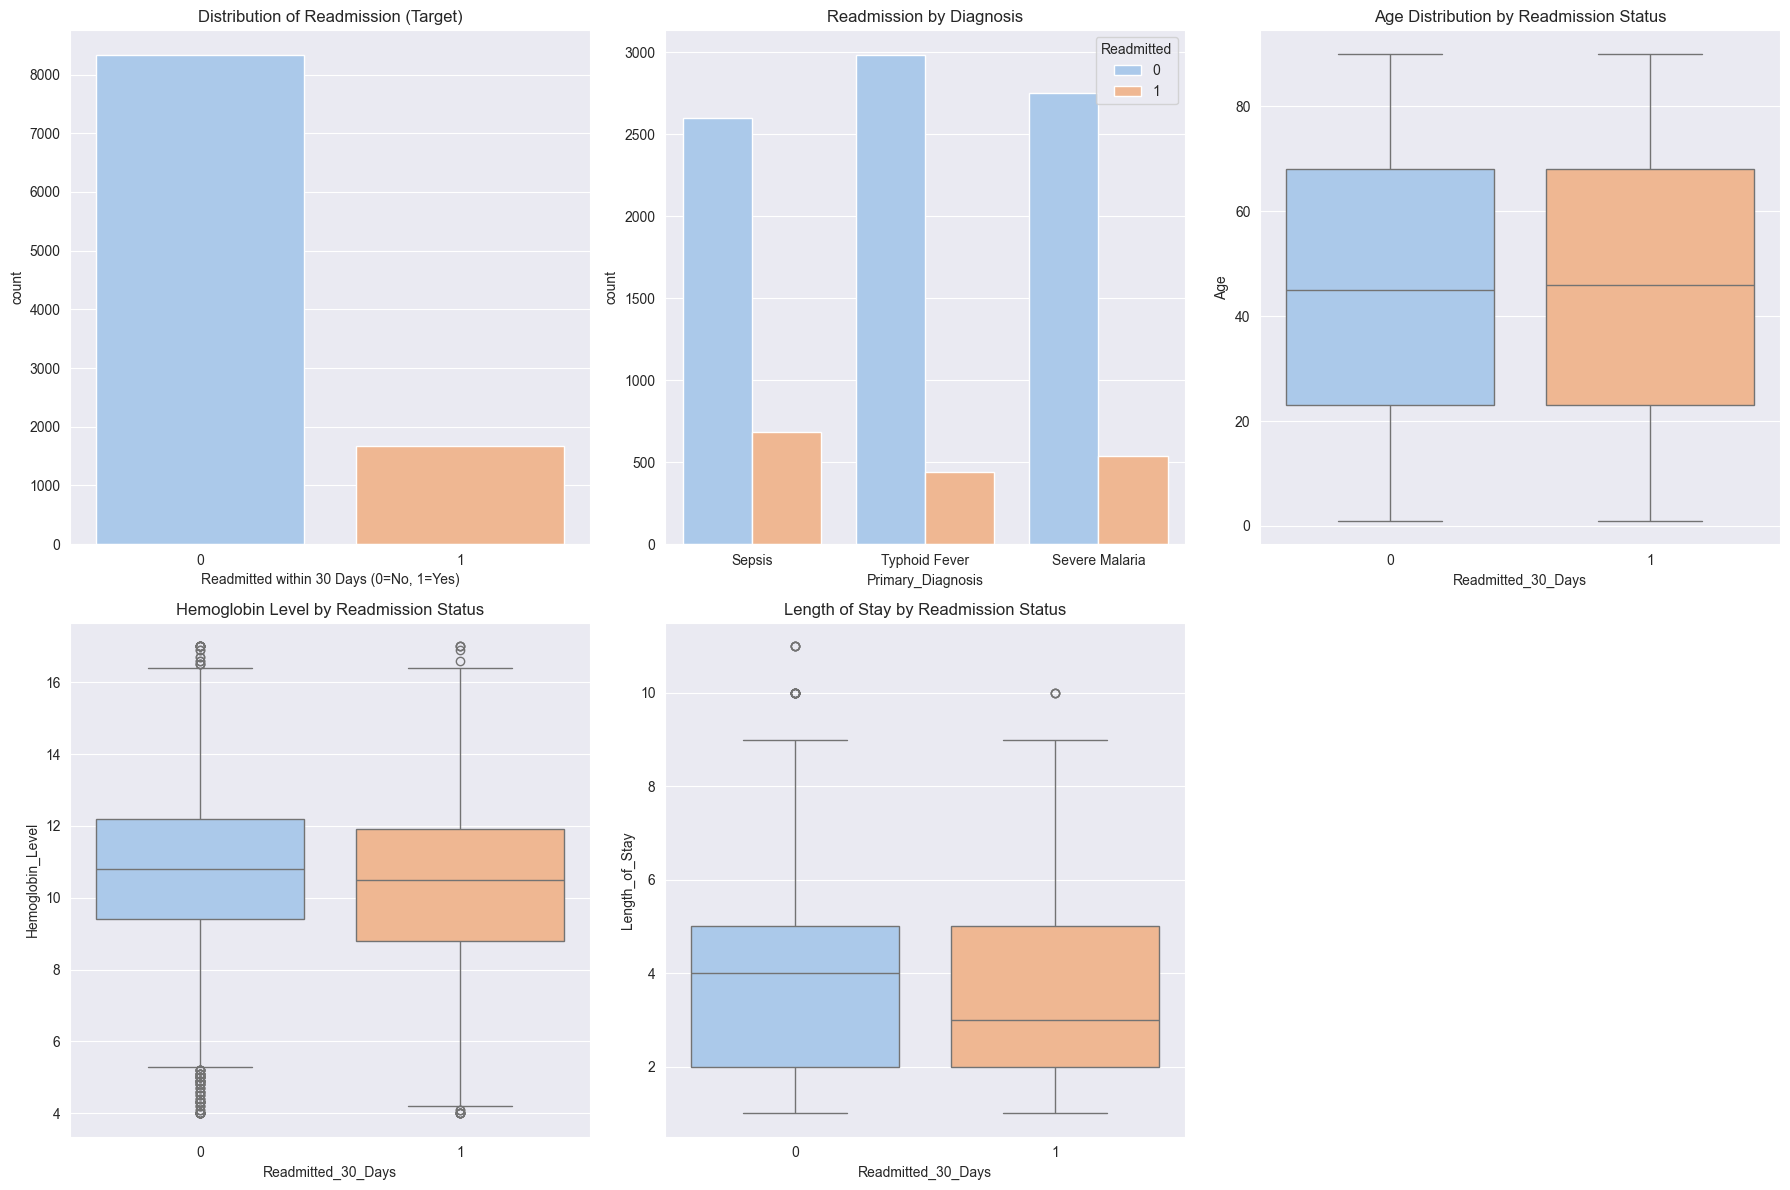

In [7]:
# Initialize the figure
plt.figure(figsize=(18, 12))

# 1. Target Distribution
plt.subplot(2, 3, 1)
sns.countplot(x='Readmitted_30_Days', data=df, palette='pastel')
plt.title('Distribution of Readmission (Target)')
plt.xlabel('Readmitted within 30 Days (0=No, 1=Yes)')

# 2. Primary Diagnosis vs Readmission
plt.subplot(2, 3, 2)
sns.countplot(x='Primary_Diagnosis', hue='Readmitted_30_Days', data=df, palette='pastel')
plt.title('Readmission by Diagnosis')
plt.legend(title='Readmitted', loc='upper right')

# 3. Age vs Readmission
plt.subplot(2, 3, 3)
sns.boxplot(x='Readmitted_30_Days', y='Age', data=df, palette='pastel')
plt.title('Age Distribution by Readmission Status')

# 4. Hemoglobin Level vs Readmission
plt.subplot(2, 3, 4)
sns.boxplot(x='Readmitted_30_Days', y='Hemoglobin_Level', data=df, palette='pastel')
plt.title('Hemoglobin Level by Readmission Status')

# 5. Length of Stay vs Readmission
plt.subplot(2, 3, 5)
sns.boxplot(x='Readmitted_30_Days', y='Length_of_Stay', data=df, palette='pastel')
plt.title('Length of Stay by Readmission Status')

# Adjust layout and show
plt.tight_layout()
plt.show()

In [8]:
"""
From our visualization, we can notice the following
1. the dataset is inbalnced as there are far more "No Readmission (0) cases than Readmission (1) cases and this is important because our future model might become biased towards predicting "No Readmission just because it is more common.

2. from our second visualization, we can see thar Sepsis seems to have the highest readmission count compared to Typhoid fever and severe malaria suggesting the type of illness is a strong predictor

3. on the 4th visual we noticed that Patients who were readmitted tend to have lower Hemoglobin levels on average compared to those who weren't. and clinical research shows that lower hemoglobin (anemia) can complicate recovery. This will likely be a very important feature for our model.

4. checking the last visual there  might be a slight trend where longer stays are associated with readmission (perhaps indicating a more severe initial case).

The summary of this is that Hemaglobin Level and diagnosis appear to be strong indicators
Age and Length of Stay show less obvious separation but are still valuable.

We have a class imbalance problem to keep in mind.
"""

'\nFrom our visualization, we can notice the following\n1. the dataset is inbalnced as there are far more "No Readmission (0) cases than Readmission (1) cases and this is important because our future model might become biased towards predicting "No Readmission just because it is more common.\n\n2. from our second visualization, we can see thar Sepsis seems to have the highest readmission count compared to Typhoid fever and severe malaria suggesting the type of illness is a strong predictor\n\n3. on the 4th visual we noticed that Patients who were readmitted tend to have lower Hemoglobin levels on average compared to those who weren\'t. and clinical research shows that lower hemoglobin (anemia) can complicate recovery. This will likely be a very important feature for our model.\n\n4. checking the last visual there  might be a slight trend where longer stays are associated with readmission (perhaps indicating a more severe initial case).\n\nThe summary of this is that Hemaglobin Level an

In [9]:
df = df.drop(columns=["Patient_ID", "Admission_Date", "Discharge_Date"], axis=1)

# Encode the Categorical Variables
"""
Label Encoding is more suitable for columns that has only two possible outcomes like yes or no, this or that, male or female questions while for columns that contain more than two possible outcomes like this, that or those questions or sepsis,malaria,or typhoid questions we use one-hot encoding
"""

le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

df = pd.get_dummies(df, columns=["Primary_Diagnosis", "Treatment"], drop_first=True)


In [10]:
# Define X and y
X = df.drop("Readmitted_30_Days", axis=1)
y = df["Readmitted_30_Days"]

In [11]:
# Split the data (80% Training, 20% Testing)
# Ensure to stratify so that we will have the same proportion of readmitted patients in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
"""
 We are going to use the RandomForest Classifier Model but to decide the exact number of parameters we are using we need to perform hyperparameter tuning and in this case we will be using the GridSearch CV
"""

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score

# Define the Parameter Grid with the n_estimators, max_depth, min_samples_leaf, class_weight

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_leaf": [1, 2, 4],
    "class_weight": ["balanced", "balanced_subsample"]
}

# Initialize the  Model
model = RandomForestClassifier(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(
    estimator= model,
    param_grid= param_grid,
    scoring= "f1",
    cv= 3,
    n_jobs= -1,
    verbose=1
)

# Run the Search
print("Starting Grid Search")
grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters found: {grid_search.best_params_}")
print(f"Best F1 Score: {grid_search.best_score_:4f}")

best_model = grid_search.best_estimator_

Starting Grid Search
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters found: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 100}
Best F1 Score: 0.240823


In [14]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = best_model.predict(X_test_scaled)
print("--- Model Evaluation on Test Set ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


--- Model Evaluation on Test Set ---
Accuracy: 0.6900

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1667
           1       0.22      0.35      0.27       333

    accuracy                           0.69      2000
   macro avg       0.54      0.55      0.54      2000
weighted avg       0.75      0.69      0.71      2000



In [15]:
import joblib

In [16]:
model_package = {
    'model': best_model,
    'scaler': scaler,
    'encoder': le,
    'columns': X.columns  # We save column names to ensure the app matches the training data
}
joblib.dump(model_package, "readmission_model.pkl")

['readmission_model.pkl']